In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import seaborn as sns

df = pd.read_json('./houseofwine.gr-wines.json', encoding='utf-8')  #③
df.head()


%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import seaborn as sns

plt.style.use('fivethirtyeight')    #①

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'Serif'
mpl.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['axes.grid'] =False
plt.rcParams['figure.facecolor']='white'    #②

df = pd.read_json('../greek-wines/houseofwine.gr-wines.json', encoding='utf-8')  #③
df.head()


In [20]:
import numpy as np
df = df.replace('', np.nan, regex=True)
df = df.rename(columns={'alcohol_%': 'alcohol', 'avg_rating_%': 'avg_rating'}, inplace=False)

In [21]:
df['alcohol'] = df.alcohol.astype(float)
df['n_votes'] = df.n_votes.astype(int, errors='ignore')
df['price'] = df.price.astype(float)
df['year'] = df.year.astype(int, errors='ignore')


In [22]:
df['color'] = df.color.replace({'Λευκός': 'White', 'Ερυθρός': 'Red', 'Ροζέ': 'Rosé'})

[Text(0, 0.5, 'Wines'), Text(0.5, 1.0, 'Wine Color Frequency')]

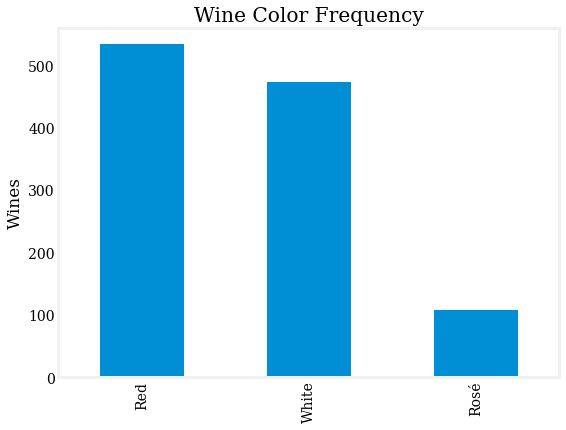

In [24]:
ax = df['color'].value_counts().plot(kind='bar')
ax.set(ylabel='Wines', title='Wine Color Frequency')


/Users/lei/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lei/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lei/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

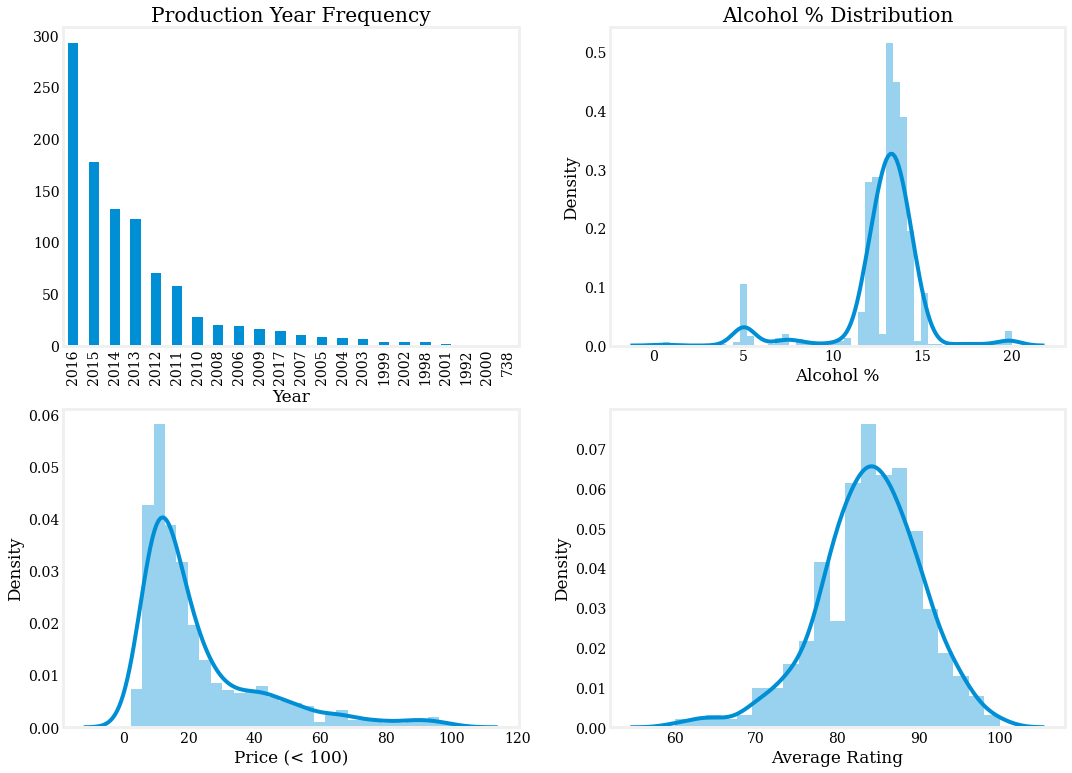

In [26]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(16,12))

df.year.dropna().astype(int).value_counts().plot(kind='bar', ax=ax1)
ax1.set(title='Production Year Frequency', xlabel='Year');

sns.distplot(df[df.alcohol < 100].alcohol.dropna(), ax=ax2)    #①
ax2.set(xlabel='Alcohol %', title='Alcohol % Distribution');

sns.distplot(df[df.price < 100].price.dropna(), ax=ax3)    #②
ax3.set(xlabel='Price (< 100)')

sns.distplot(df.avg_rating.dropna(), ax=ax4)
ax4.set(xlabel='Average Rating');


In [27]:
wine_name = df['name']
laf_name = []
for name in wine_name:
    try:
        name_lst = name.split()
        if "Lafite" in name_lst:
            laf_name.append(name)
            #laf = df[df['name']==name]
    except:
        pass
print(laf_name)


['Château Lafite Rothschild 2005']


In [29]:
laf = df[df['name']==laf_name[0]]
laf[['name', 'price', 'year', 'color', 'avg_rating', 'alcohol']]


,name,price,year,color,avg_rating,alcohol
16,Château Lafite Rothschild 2005,3100.0,2005.0,Red,NaN,12.5


In [30]:
df.tags.head(10)

0                         [Riesling, Ήπιος, Ημίγλυκος]
1                      [Ήπιος, Sauvignon Blanc, Ξηρός]
2                    [Ήπιος, Ξηρός, Ξινόμαυρο, Merlot]
3                 [Ήπιος, Ξηρός, Ασύρτικο, Μαλαγουζιά]
4                             [Ήπιος, Ξηρός, Pinotage]
5                           [Ήπιος, Sangiovese, Ξηρός]
6                            [Ήπιος, Ξηρός, Ξινόμαυρο]
7    [Cabernet Sauvignon, Ήπιος, 13, Ξηρός, Merlot,...
8                                      [Ήπιος, Γλυκός]
9                               [Ήπιος, Αηδάνι, Ξηρός]
Name: tags, dtype: object

In [31]:
df['tags'] = df.tags.map(set)    #①
sweetness_values = {'Γλυκός', 'Ημίγλυκος', 'Ξηρός', 'Ημίξηρος'}    #②

df['sweetness'] = df.tags.map(sweetness_values.intersection).map(lambda x: x.pop() if x else None)    #③

translations = {'Γλυκός': 'Sweet', 'Ημίγλυκος': 'Semi-Sweet', 'Ξηρός': 'Dry', 'Ημίξηρος': 'Semi-Dry'}
df['sweetness'] = df['sweetness'].replace(translations)    #④


In [33]:
df['sparkling'] = df.tags.map({'Αφρώδης', 'Ημιαφρώδης'}.intersection
                         ).map(lambda x: x.pop() if x else None
                          ).replace({'Αφρώδης': 'Sparkling', 'Ημιαφρώδης': 'Semi-Sparkling'}
)
df['sparkling'] = df.sparkling.fillna('Not Sparkling')


In [34]:
df['is_mild'] = df.tags.map(lambda x: 'Ήπιος' in x)

<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/tp/h2g8v3m90xx_lldytz_5vrm80000gn/T/ipykernel_38172/3710056018.py:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
  attr_str = 'Mildness' if attr is 'is_mild' else attr.title()


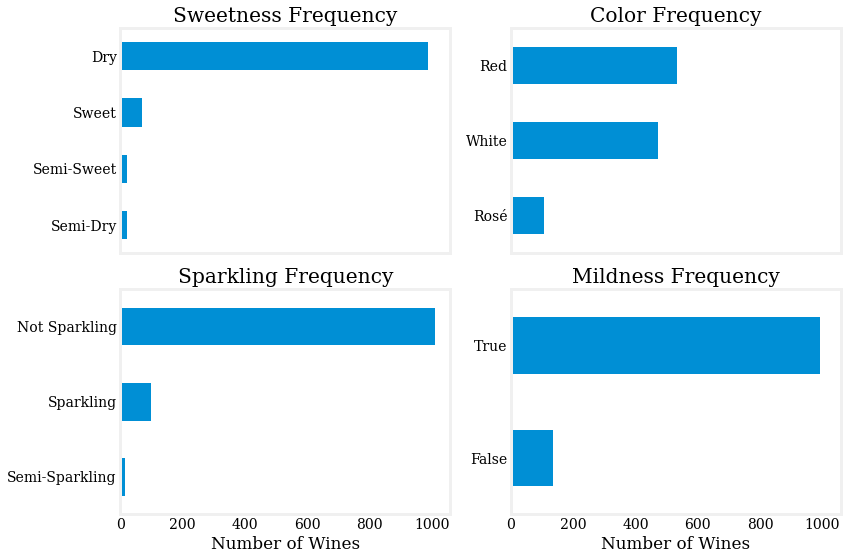

In [35]:
 fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, squeeze=False)

for attr, ax in zip(['sweetness', 'color', 'sparkling', 'is_mild'], (ax1, ax2, ax3, ax4)):
    df[attr].value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax)
    attr_str = 'Mildness' if attr is 'is_mild' else attr.title()
    ax.set(xlabel='Number of Wines', title='{} Frequency'.format(attr_str));
    
fig.set_size_inches((12,8))
fig.tight_layout()


In [36]:
non_varietal_tags = {'Αφρώδης', 'Ημιαφρώδης', 'Ξηρός', 'Ημίξηρος', 'Γλυκός', 'Ημίγλυκος', 'Ήπιος'}
df['varieties'] = df.tags.map(lambda t: t.difference(non_varietal_tags))


In [37]:
def is_not_int(x):
    try:
        int(x)
        return False
    except ValueError:
        return True
    
df['varieties'] = df.varieties.map(lambda x: set(filter(is_not_int, x)))


In [38]:
 df['is_varietal'] = df.varieties.map(set.__len__) == 1
df[['name', 'tags', 'is_varietal', 'varieties']].head()


,name,tags,is_varietal,varieties
0,Riesling Spatlese 2013,"{Ημίγλυκος, Ήπιος, Riesling}",True,{Riesling}
1,Spy Valley - Sauvignon Blanc 2016,"{Ξηρός, Sauvignon Blanc, Ήπιος}",True,{Sauvignon Blanc}
2,Cava Χρυσοχόου 2008,"{Ξηρός, Ξινόμαυρο, Ήπιος, Merlot}",False,"{Ξινόμαυρο, Merlot}"
3,Κτήμα Γεροβασιλείου - Λευκός 2016,"{Ξηρός, Ήπιος, Μαλαγουζιά, Ασύρτικο}",False,"{Μαλαγουζιά, Ασύρτικο}"
4,Landskroon - Pinotage 2013,"{Ξηρός, Ήπιος, Pinotage}",True,{Pinotage}


In [39]:
df.loc[df.is_varietal, 'single_variety'] = df.loc[df.is_varietal, 'varieties'].map(lambda v: next(iter(v)))
df[['name', 'is_varietal', 'varieties', 'single_variety']].head()


,name,is_varietal,varieties,single_variety
0,Riesling Spatlese 2013,True,{Riesling},Riesling
1,Spy Valley - Sauvignon Blanc 2016,True,{Sauvignon Blanc},Sauvignon Blanc
2,Cava Χρυσοχόου 2008,False,"{Ξινόμαυρο, Merlot}",NaN
3,Κτήμα Γεροβασιλείου - Λευκός 2016,False,"{Μαλαγουζιά, Ασύρτικο}",NaN
4,Landskroon - Pinotage 2013,True,{Pinotage},Pinotage


In [40]:
df['is_blend'] = df.varieties.map(set.__len__) >= 2

In [41]:
df.loc[df.is_varietal, 'variety_type'] = 'Varietal'
df.loc[df.is_blend, 'variety_type'] = 'Blend'
df[['name', 'is_varietal', 'single_variety', 'is_blend', 'variety_type', 'variety_type']].head()


,name,is_varietal,single_variety,is_blend,variety_type,variety_type
0,Riesling Spatlese 2013,True,Riesling,False,Varietal,Varietal
1,Spy Valley - Sauvignon Blanc 2016,True,Sauvignon Blanc,False,Varietal,Varietal
2,Cava Χρυσοχόου 2008,False,NaN,True,Blend,Blend
3,Κτήμα Γεροβασιλείου - Λευκός 2016,False,NaN,True,Blend,Blend
4,Landskroon - Pinotage 2013,True,Pinotage,False,Varietal,Varietal


[Text(0.5, 1.0, 'How many wines are varietals and how many blends ?')]

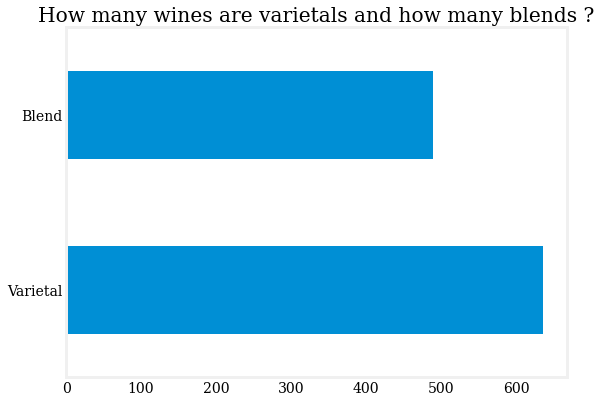

In [43]:
ax = df.is_varietal.replace({True: 'Varietal', False: 'Blend'}).value_counts().plot( kind='barh')
ax.set(title='How many wines are varietals and how many blends ?')


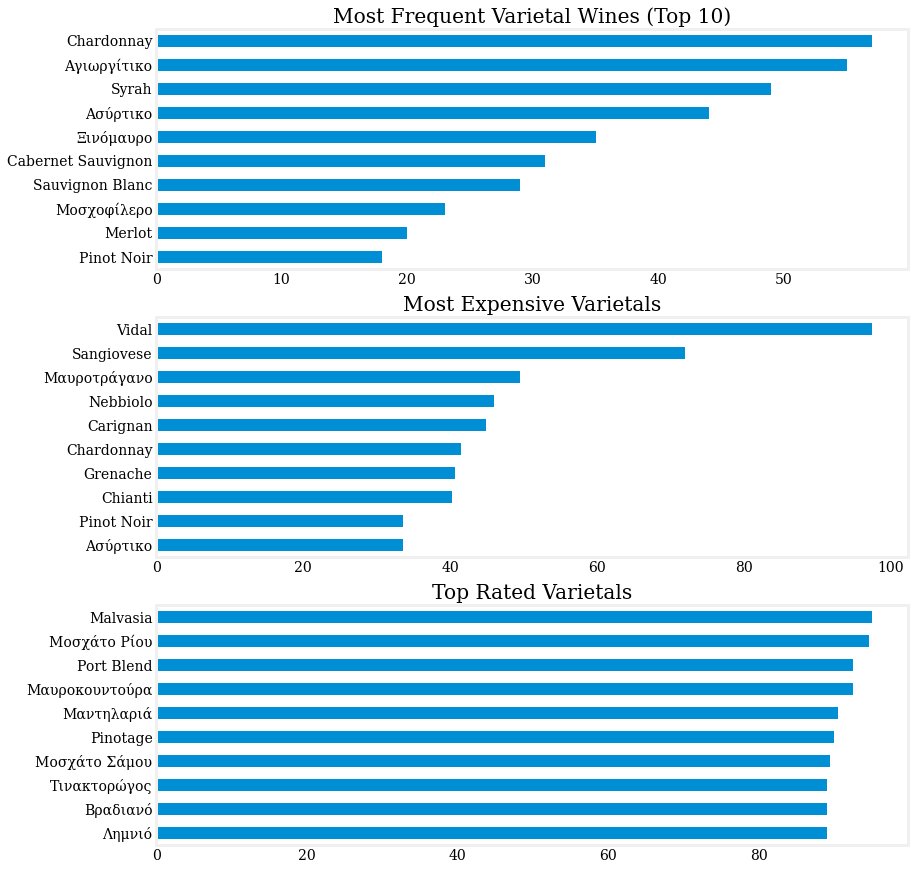

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(12,14))

varieties_hist = df[df.is_varietal].varieties.map(lambda x: next(iter(x))).value_counts()
varieties_hist.head(10).sort_values(ascending=True).plot(kind='barh', ax=ax1)
ax1.set(title='Most Frequent Varietal Wines (Top 10)');

varietals_mean_price = df[['single_variety', 'price']].groupby('single_variety'
).mean().dropna()['price']
varietals_mean_price.sort_values(ascending=False
).head(10).sort_values(ascending=True).plot(kind='barh', ax=ax2)
ax2.set(title='Most Expensive Varietals', xlabel='', ylabel='');

varietals_mean_rating = df[['single_variety', 'avg_rating']].groupby('single_variety'
).mean().dropna()['avg_rating']
varietals_mean_rating.sort_values(ascending=False
).head(10).sort_values(ascending=True).plot(kind='barh', ax=ax3);
ax3.set(title='Top Rated Varietals', ylabel='');



In [49]:
df.loc[df['is_blend']==True, ['name', 'is_blend', 'varieties']].head()

,name,is_blend,varieties
2,Cava Χρυσοχόου 2008,True,"{Ξινόμαυρο, Merlot}"
3,Κτήμα Γεροβασιλείου - Λευκός 2016,True,"{Μαλαγουζιά, Ασύρτικο}"
7,Ψίθυρος Ερυθρός 2010,True,"{Λιάτικο, Merlot, Cabernet Sauvignon}"
11,Côte Rôtie 2012,True,"{Syrah, Viognier}"
13,Château d' Yquem 2002,True,"{Sauvignon Blanc, Semillon}"


In [50]:
docs = df.loc[df.is_blend, 'varieties'].map(
lambda x: {s.replace(' ', '_') for s in x}
).map(lambda x: ' '.join(x))
docs.head()


2                      Ξινόμαυρο Merlot
3                   Μαλαγουζιά Ασύρτικο
7     Merlot Cabernet_Sauvignon Λιάτικο
11                       Syrah Viognier
13             Semillon Sauvignon_Blanc
Name: varieties, dtype: object

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
count_model = CountVectorizer(lowercase=False, min_df=.1)
X = count_model.fit_transform(docs)
X


<429x8 sparse matrix of type '<class 'numpy.int64'>'
	with 638 stored elements in Compressed Sparse Row format>

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

def create_coocurrence_df(docs):
         # Source: https://stackoverflow.com/a/37822989
    count_model = CountVectorizer(lowercase=False, min_df=.1) # default unigram model
    X = count_model.fit_transform(docs)
    Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
    Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
    ret = pd.DataFrame(Xc.todense())
#, index=count_model.get_feature_names(), 
#columnscou=count_model.get_feature_names())
    ret.index = ret.columns = list(map(lambda f: f.replace('_', ' '), count_model.get_feature_names()))
    return ret

coocurrence = create_coocurrence_df(docs)
coocurrence


/Users/lei/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Cabernet Franc,Cabernet Sauvignon,Chardonnay,Merlot,Pinot Noir,Syrah,Αγιωργίτικο,Ασύρτικο
Cabernet Franc,0,42,0,52,0,2,1,0
Cabernet Sauvignon,42,0,0,85,1,24,21,0
Chardonnay,0,0,0,0,46,0,0,8
Merlot,52,85,0,0,1,29,7,0
Pinot Noir,0,1,46,1,0,1,0,0
Syrah,2,24,0,29,1,0,11,0
Αγιωργίτικο,1,21,0,7,0,11,0,0
Ασύρτικο,0,0,8,0,0,0,0,0


[Text(0.5, 1.0, 'Most Frequent Varieties Appearing in Blends (Top 10)')]

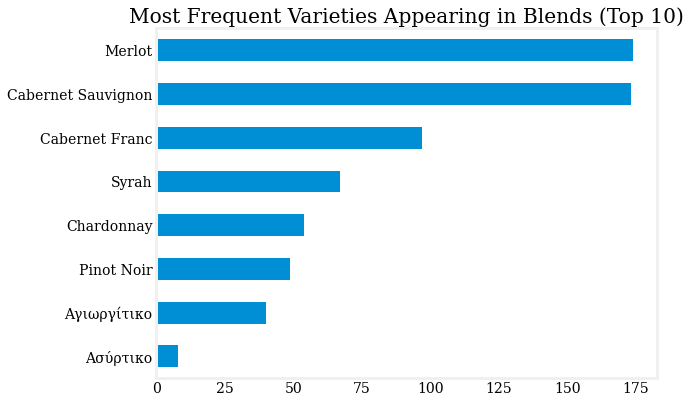

In [53]:
ax = coocurrence.sum().sort_values(ascending=False
).head(10).sort_values(ascending=True).plot(kind='barh')
ax.set(title='Most Frequent Varieties Appearing in Blends (Top 10)')


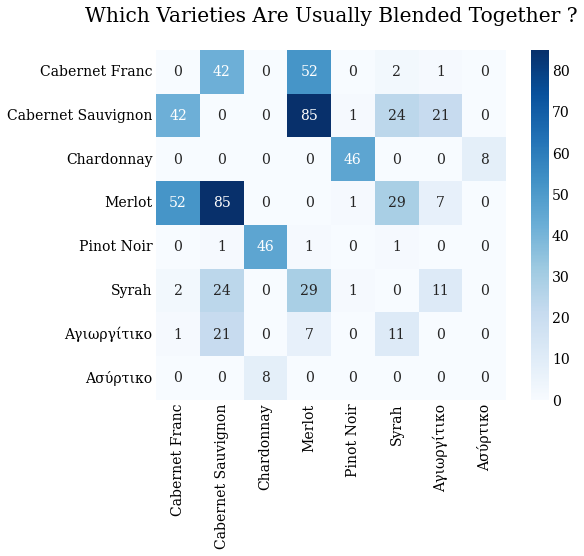

In [54]:
ax = sns.heatmap(coocurrence, square=True, annot=True, fmt="d", cmap='Blues')
ax.set(title='Which varieties are usually blended together ?\n'.title());
plt.gcf().set_size_inches((8,6))


/Users/lei/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/lei/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/lei/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


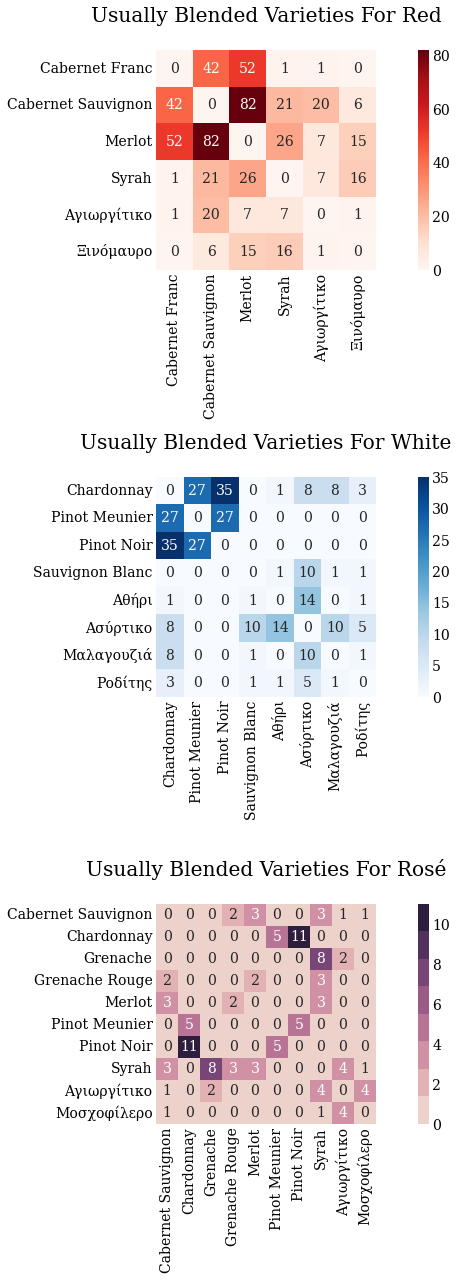

In [55]:
fig, axes = plt.subplots(nrows=3, figsize=(12, 18))
for c, ax in zip(['Red', 'White', 'Rosé'], axes):
    docs = df.loc[df.is_blend & (df.color==c), 'varieties'].map(
lambda x: {s.replace(' ', '_') for s in x}).map(lambda x: ' '.join(x))
    cooc = create_coocurrence_df(docs)
    cmaps = {'Red': 'Reds', 'White': 'Blues', 'Rosé': sns.cubehelix_palette(8)}
    sns.heatmap(cooc, square=True, annot=True, fmt="d", cmap=cmaps.get(c), ax=ax)
    ax.set(title='Usually blended varieties for {}\n'.format(c).title());
plt.tight_layout()
